# Support Vector Machine (SVM)
ist ein Submodul von Sklearn. Es enthält Algorithmen für Klassifikation, Regression und Ausreißer-Berechnung (outlier detection).

## Support Vector Classifier (SVC)
ist ein Algorithmus aus dem Submodul SVM. Er dient zur Lösung von Klassifikaltionsprolmenen.

## Wie funktioniert SVC?

<center><img src='img.png' width='450px;'/></center>

Der Algorithmus erstellt ein Vector und klassifiziert damit die Datenpunkte (Orangen und Erdbeeren), sodass möglichst auf einer Seite mehr ähnliche Objekte liegen. Dann berechnet er den Durchschnittsabstand von Objekten jeder Klasse von diesem Vektor und dann dreht das Vektorobjekt so oft, bis die Abstände den minimalen Wert erreichen.

## Beispiel: Krebsdatensatz aus SciKit-Learn

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
from sklearn.datasets import load_breast_cancer

In [26]:
cancer = load_breast_cancer() # den eingebauten Datensatz laden

In [27]:
dir(cancer) # den Inhalt zeigen: ein Bündel aus verschiedenen Daten

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [28]:
cancer.keys() # die Schlüssel zu den Ihnalten

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## DataFrame

In [30]:
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names) # Ein Dataframe mit den gegebenen Merkmalen - ohne Target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
cancer_df['target'] = cancer.target # Targetspalte hinzufügen
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Ziel
Das Ziel ist anhand gegebenen Merkmalen einzuschätzen, ob eine Patientin mit Brustkrebs erkrannt werden könnte (oder nicht). Wir haben dazu Informationen von Patientinnen in der Vergangenheit gesammelt (cancer dataframe) und wir wollen ein Modell erzeugen, welches dann eine Diagnose macht. Hierfür haben wir die Spalte `target`, wo `0` negativ und `1` positiv heißt.

## SVC Modell erstellen und trainieren

Zur Erstellung von einem Klassifikationsmodell für dieses Beispiel erstellen wir ein SVC-Modell

In [32]:
from sklearn.svm import SVC

# ? SVC
svc_model = SVC(probability=True,max_iter=1000)

In [33]:
# Daten aufsplitten: trainset und testset
from sklearn.model_selection import train_test_split

X = cancer_df.drop('target', axis='columns')
y = cancer_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# Modell trainieren
svc_model.fit(X_train, y_train)

SVC(max_iter=1000, probability=True)

## Modell auswerten

In [35]:
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay

In [36]:
# Testdaten 
y_true = y_test # die wahren Werte
y_pred = svc_model.predict(X_test) # die Voraussagen

In [57]:
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[ 59   8]
 [  1 120]]


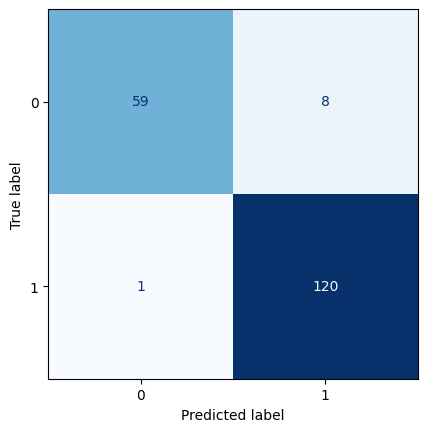

In [38]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", colorbar=False)
plt.show()

## Wahrscheinlichkeit anstelle von einer absoluten Zuordnung
Bei der Modellerstellung haben wir das Parameter `probablity=True` übergeben. Dies dient dazu, dass das Modell nicht nur ein Exemplar zu einer gewissen Klasse zurodnet, sondern auch dazu, das es in der Lage ist die Zugehörigheitswahrscheinlichkeit berechnet.

In [39]:
# wir nehmen ein Beispiel aus dem Datensatz
X_test.iloc[np.random.choice(X_test.index)]

mean radius                 12.560000
mean texture                19.070000
mean perimeter              81.920000
mean area                  485.800000
mean smoothness              0.087600
mean compactness             0.103800
mean concavity               0.103000
mean concave points          0.043910
mean symmetry                0.153300
mean fractal dimension       0.061840
radius error                 0.360200
texture error                1.478000
perimeter error              3.212000
area error                  27.490000
smoothness error             0.009853
compactness error            0.042350
concavity error              0.062710
concave points error         0.019660
symmetry error               0.026390
fractal dimension error      0.004205
worst radius                13.370000
worst texture               22.430000
worst perimeter             89.020000
worst area                 547.400000
worst smoothness             0.109600
worst compactness            0.200200
worst concav

In [40]:
y_test[498]

np.int64(0)

In [41]:
cancer_df.iloc[498]

mean radius                  18.490000
mean texture                 17.520000
mean perimeter              121.300000
mean area                  1068.000000
mean smoothness               0.101200
mean compactness              0.131700
mean concavity                0.149100
mean concave points           0.091830
mean symmetry                 0.183200
mean fractal dimension        0.066970
radius error                  0.792300
texture error                 1.045000
perimeter error               4.851000
area error                   95.770000
smoothness error              0.007974
compactness error             0.032140
concavity error               0.044350
concave points error          0.015730
symmetry error                0.016170
fractal dimension error       0.005255
worst radius                 22.750000
worst texture                22.880000
worst perimeter             146.400000
worst area                 1600.000000
worst smoothness              0.141200
worst compactness        

In [42]:
# wir haben das Exemplar mit Index 498 - Diagnose ist positiv und wir wollen unser Modell daran testen

svc_model.predict([cancer_df.iloc[498][:-1]])

c:\Users\winbob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [43]:
svc_model.predict_proba([cancer_df.iloc[498][:-1]]) # Wahrscheinlichkeiten

c:\Users\winbob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[9.99186478e-01, 8.13521938e-04]])

## Modells Leistung

In [44]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        67
           1       0.94      0.99      0.96       121

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



##  GridSearch
In vielen Aufgaben können Modelle mit unterschiedlichen Parametern erstellt, trainiert und getestet werden, sodass man am Ende ein optimales Setting aus verschiedenen Parametern bekommt, mitdem ein Modell eine bessere Leistung liefert.

In unserem Beispiel haben wir ein Modell der Klasse `SVC` erstellt. Wir können dieses Modell mit unterschiedlichen Parametern ausprobieren:

```python
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
```

In [45]:
# Vordefinierte (selbstdefinierte) Parameter-Kombinationen
# Wir müssen diese Parameter genau kennen und die Werte nicht einfach willkürlich zuweisen

param_grid = {
    'C' : [0.1, 1,10,100,1000],
    'gamma' : [1.0, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : [ 'rbf', 'sigmoid']
}

In [46]:
from sklearn.model_selection import GridSearchCV

Dadurch dass wir ein Modell mit verschiedenen Parameterkombinationen ausprobieren wollen, setzen wir `verbose` gleich einer beliebigen Zahl z.B. 5 oder 3 und `refit=True` (damit dasselbe Modell immer wieder trainiert wird).

```python
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
```

In [47]:
grid = GridSearchCV(
                   SVC(),
                   param_grid,
                   refit=True,
                   verbose=3
)

Grid trainieren

In [48]:
%%timeit
%%capture
grid.fit(X_train,y_train)

3.49 s ± 63.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Die beste Kombination abfragen

In [49]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [50]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

Wir können jetzt dieses Modell testen

In [51]:
grid_pred = grid.predict(X_test)

In [52]:
print(confusion_matrix(y_true, grid_pred))

[[ 63   4]
 [  3 118]]


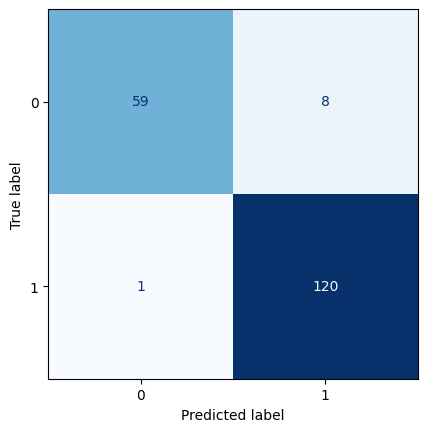

In [63]:
y_pred = svc_model.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred) # Erstes Modell

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", colorbar=False)
plt.show()

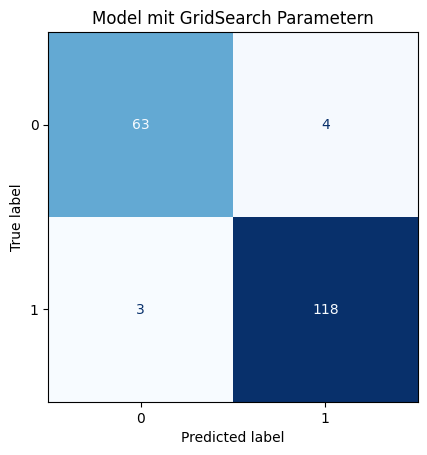

In [64]:
y_pred = grid.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred) # Grid Modell

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Model mit GridSearch Parametern")
plt.show()

Wei man sieht, unterschiedliche Kombinationen aus Parametern können die Leistung des Modells beeinflussen. Allerdings verbessert GridSearch von sich selbst die Leistung des Modells nicht unbeding.

### Moral der Geschichte: Wer mit künstlicher Intelligenz arbeitet, muss mit natürlicher Dummheit rechnen!